In [59]:
# Facebook data mining bootcamp !!!

# important imports 
import os
import json
import numpy as np
import pylab as pl
import datetime
from datetime import datetime


In [60]:
# globals 

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 700
MESSAGE_THRESHOLD = 0
MESSAGE_BOUND = 100000


In [61]:
# get json data for the individual chats in your messages folder 

def get_json_data(chat):
    try:
        # you may need to change the directory path, depends on where you've downloaded your fb messages to. 
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)


    
# create new globals for data to be plotted 
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0


In [62]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

# sort data into new gobals 

for chat in chats:
    url = chat + 'message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 31 chats...
jalissapirro_gefyadsegw
manuellazala_-qke1jjjrw
emilynavichoque_hfamkmtzvg
benedictaolonilua_isdk0qxv3a
jingjingshen_klbag4ezla
alondracoyt_jixnb7_nbq
estherxiang_usjgnp2vya
emmanuelolonilua_fhyy5ea3dq
reneemccaine_kgm1zpmqta
SandyJackson_EPidUaeXJg
beverlyaiyanyor_gyrihoh01g
zulemacastro_hs_urkjjma
melindameng_4mie3asc8q
simonjudelevien_orrdbnehdw
alexanderkoenig_wx_esq-p8g
amandaandreoli_lgafoawi-q
jackiesor_5hjfcxkkdw
matthewmiller_0n3dzwkidg
jasonmunguia_gv1spq_zpq
messenger_kdzuosctba
moyahcameron_y7bxi_rkyg
vanessavasquez_v9gg1izhxa
katelynpetrosky_wogbduw8ja
daniellaolonilua_wbaukpz_ha
valeriavela_02vyzfvywa
franceschoi_dpddcwuybq
mihaelamarculescu_cxq-rucwlg
katieheintz_7c0dckgpeq
michaelberman_g_adghlc5q
moirasullivan_d-mzvueflw
cassiewang_ncvjlj1a0a
Finished processing chats...


In [63]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 35 messages - daniellaolonilua_wbaukpz_ha
1 - 25 messages - emmanuelolonilua_fhyy5ea3dq
2 - 13 messages - benedictaolonilua_isdk0qxv3a
3 - 9 messages - SandyJackson_EPidUaeXJg
4 - 8 messages - alexanderkoenig_wx_esq-p8g
5 - 2 messages - messenger_kdzuosctba
6 - 2 messages - franceschoi_dpddcwuybq
7 - 1 messages - zulemacastro_hs_urkjjma
8 - 1 messages - vanessavasquez_v9gg1izhxa
9 - 1 messages - valeriavela_02vyzfvywa
10 - 1 messages - simonjudelevien_orrdbnehdw
11 - 1 messages - reneemccaine_kgm1zpmqta
12 - 1 messages - moyahcameron_y7bxi_rkyg
13 - 1 messages - moirasullivan_d-mzvueflw
14 - 1 messages - mihaelamarculescu_cxq-rucwlg
15 - 1 messages - michaelberman_g_adghlc5q
16 - 1 messages - melindameng_4mie3asc8q
17 - 1 messages - matthewmiller_0n3dzwkidg
18 - 1 messages - manuellazala_-qke1jjjrw
19 - 1 messages - katieheintz_7c0dckgpeq
20 - 1 messages - katelynpetrosky_wogbduw8ja
21 - 1 messages - jingjingshen_klbag4ezla
22 - 1 messages - jasonmunguia_gv1spq_zpq
23 - 1 messages 

In [64]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_average_time_per_message(chat_number):
    temp = {}
    for person in final_data_messages[chat_number]:
        temp[person] = (message["timestamp_ms"] / 3600000000.0) / final_data_messages[chat_number][person]
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.0)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Time (Hours) Between Messages')
    pl.tight_layout()
    pl.show()

def plot_histogram_part_of_total_messages(chat_number):
    temp = {}
    numMessages = 0.0;
    for person in final_data_messages[chat_number]:
        numMessages += final_data_messages[chat_number][person]
    for person in final_data_messages[chat_number]:
        temp[person] = final_data_messages[chat_number][person] / numMessages
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.0)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Proportion')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)
    plot_histogram_average_time_per_message(chat_number)
    plot_histogram_proportion_of_total_messages(chat_number)

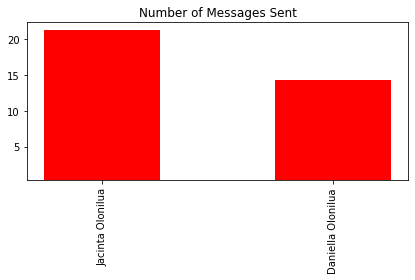

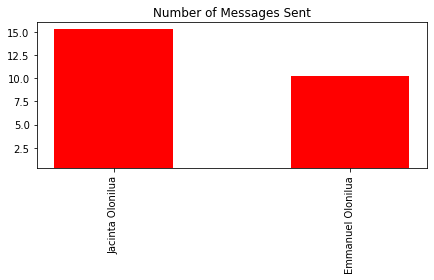

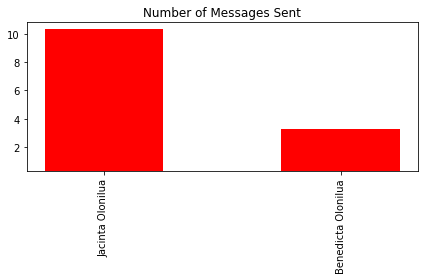

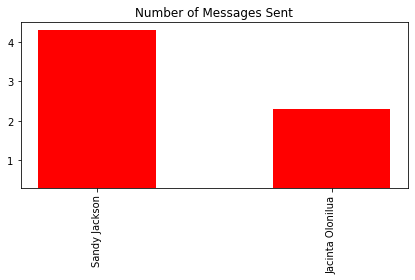

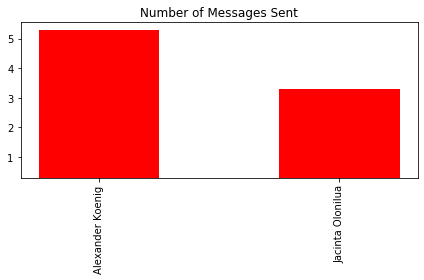

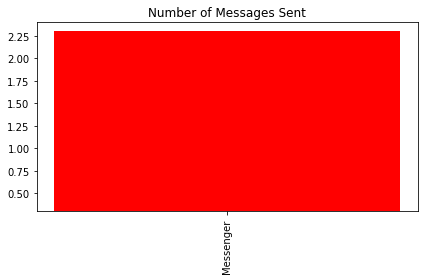

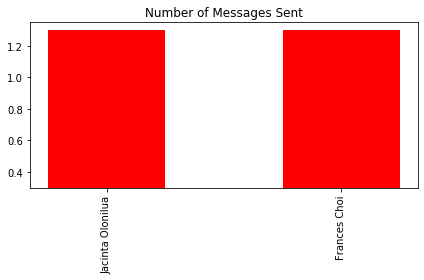

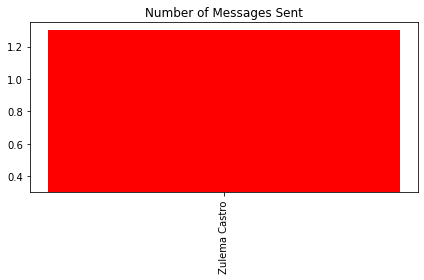

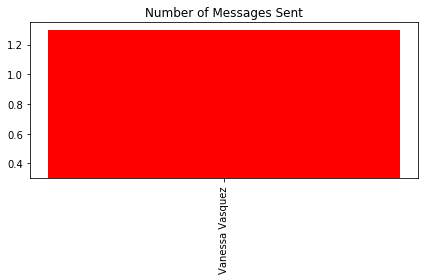

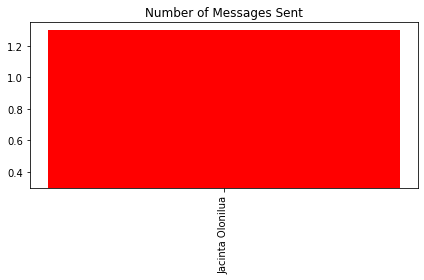

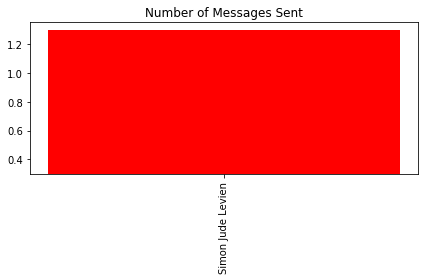

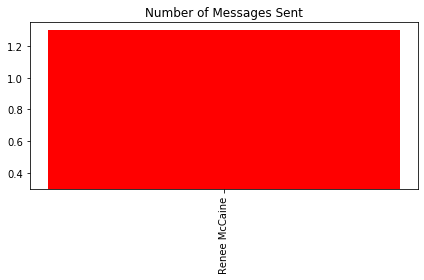

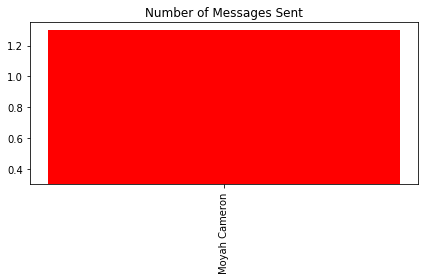

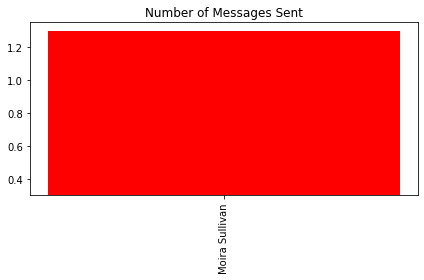

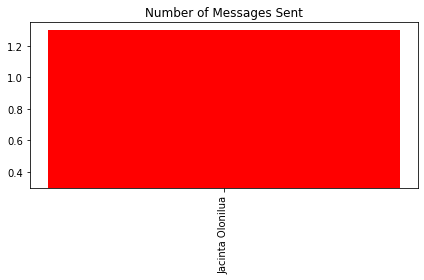

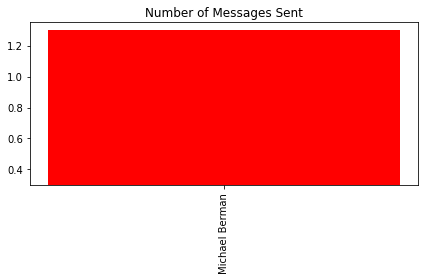

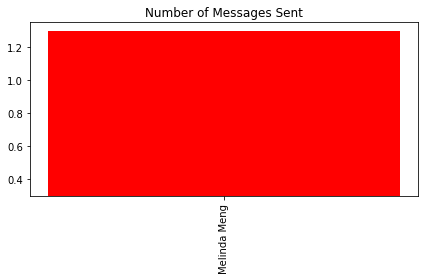

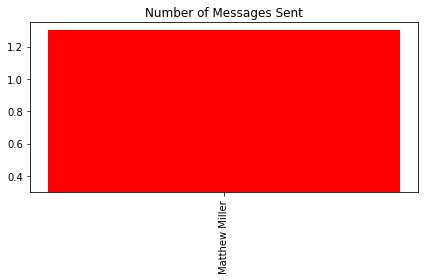

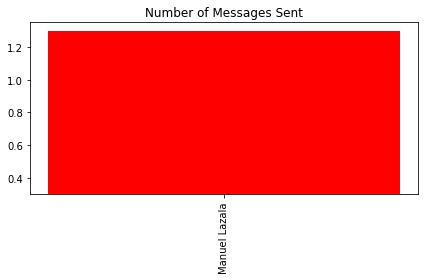

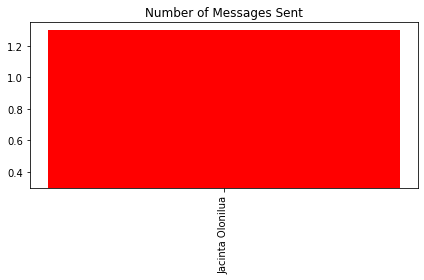

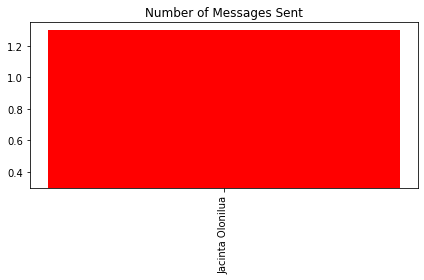

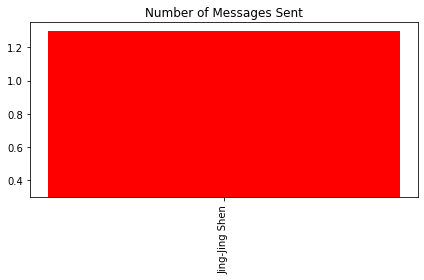

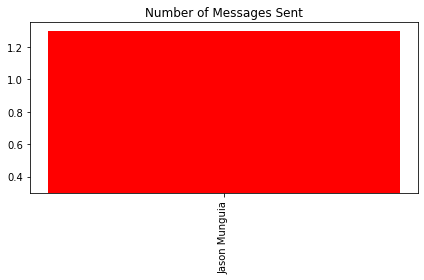

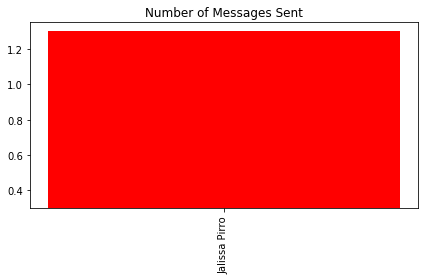

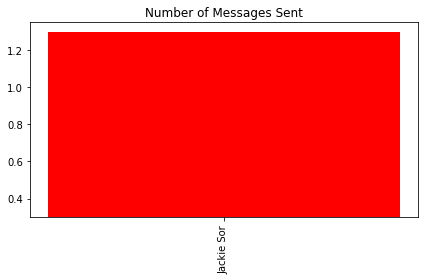

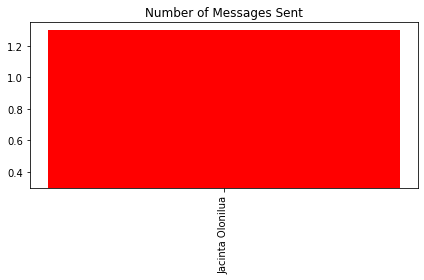

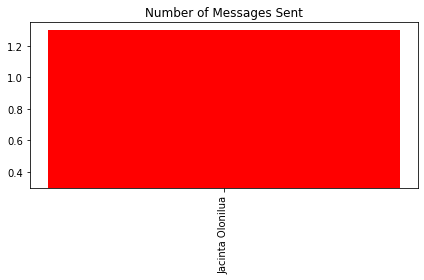

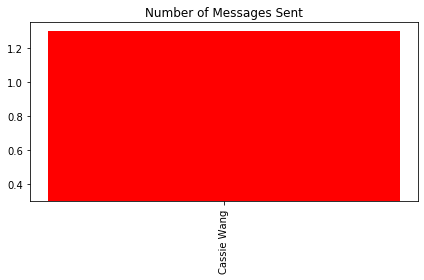

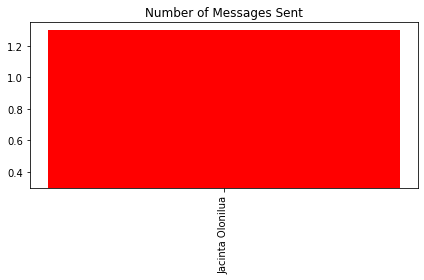

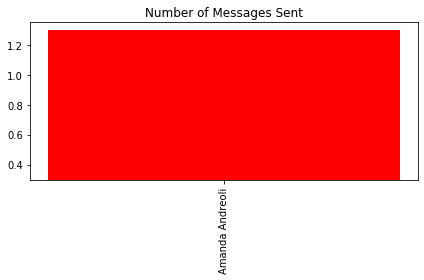

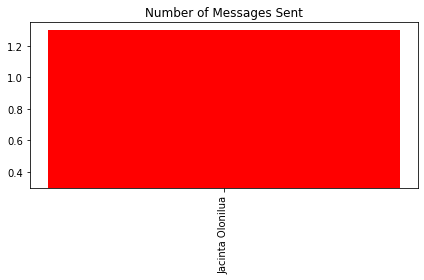

In [65]:
for i in range(0, len(sorted_chats)):
    plot_num_messages(i)

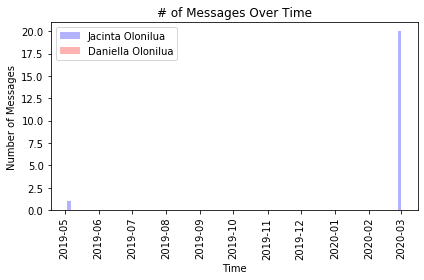

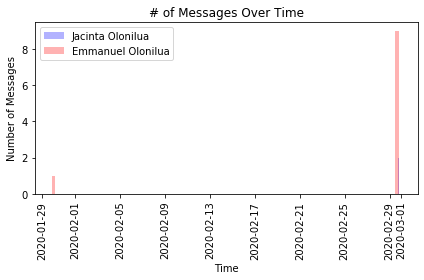

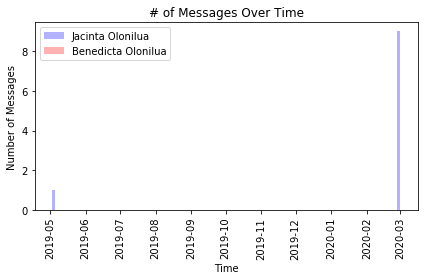

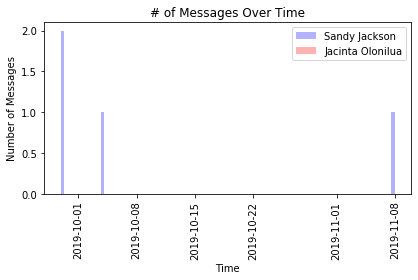

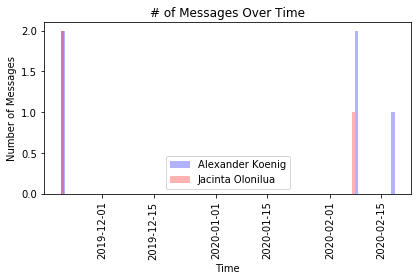

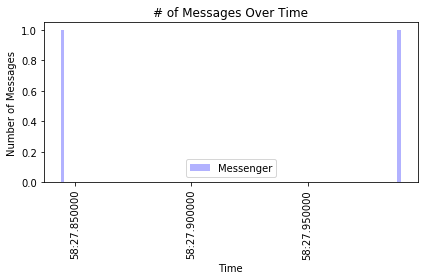

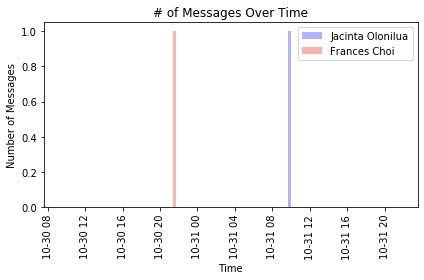

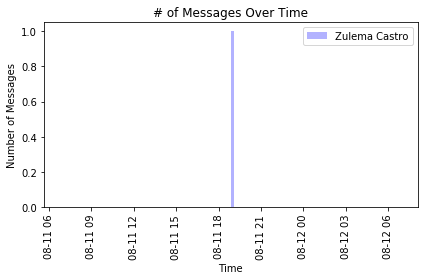

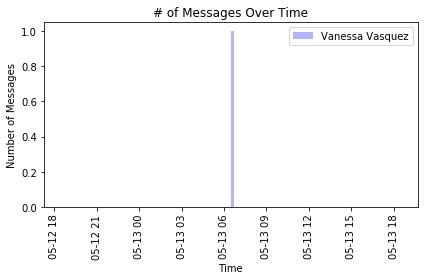

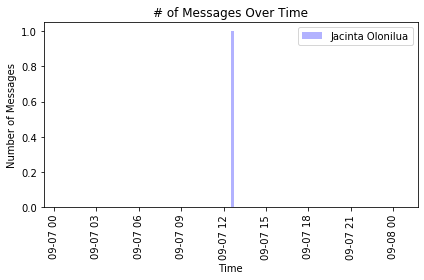

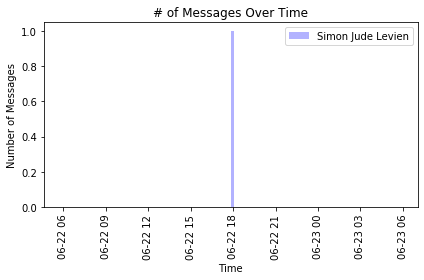

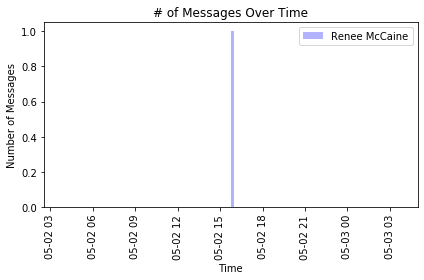

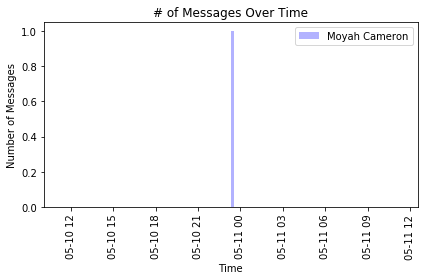

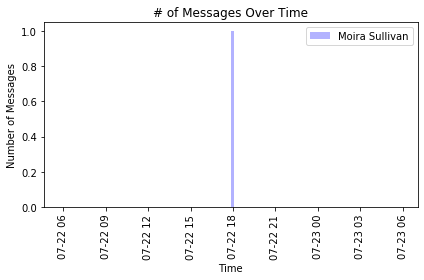

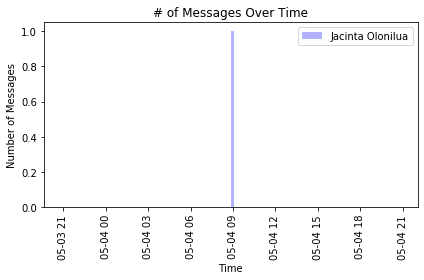

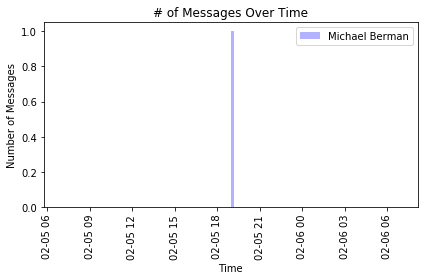

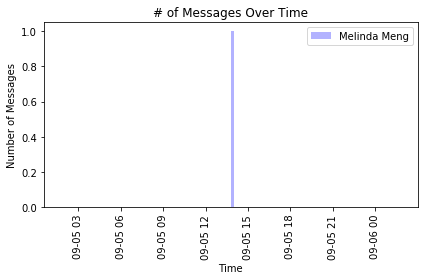

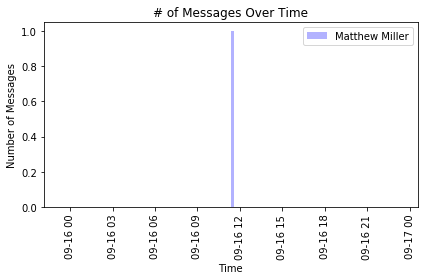

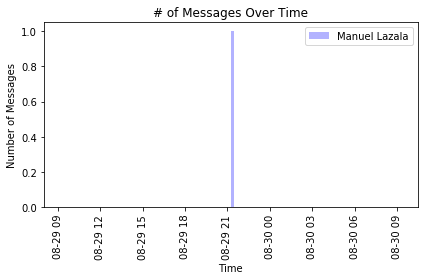

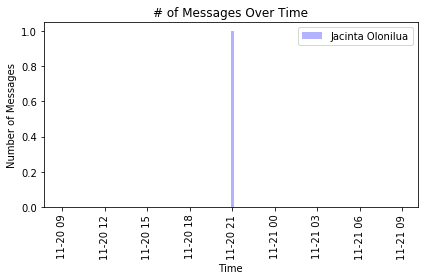

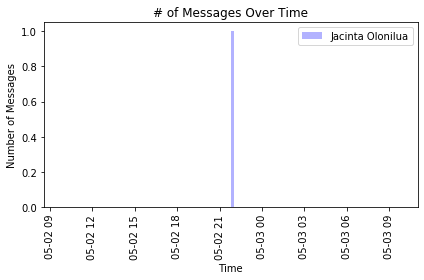

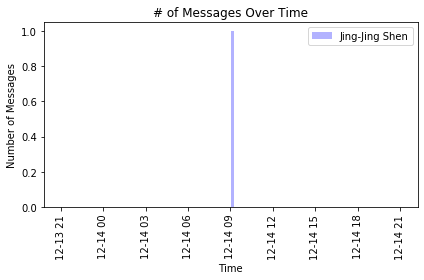

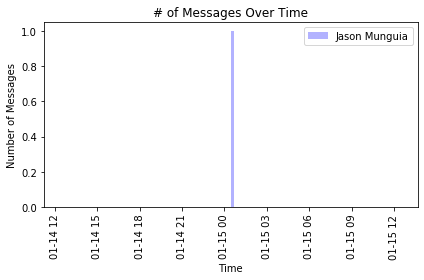

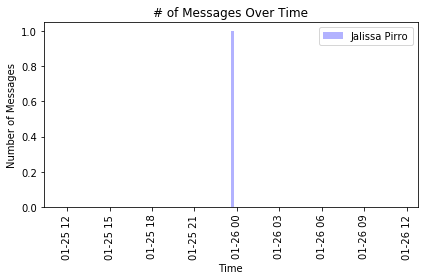

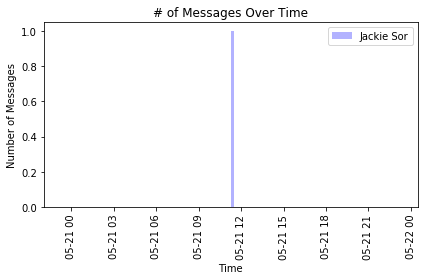

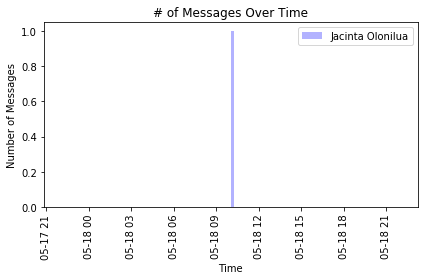

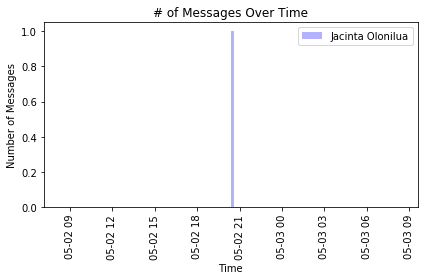

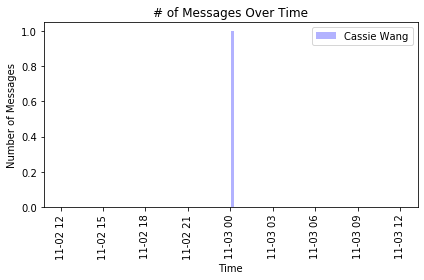

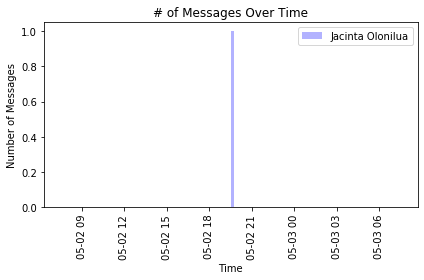

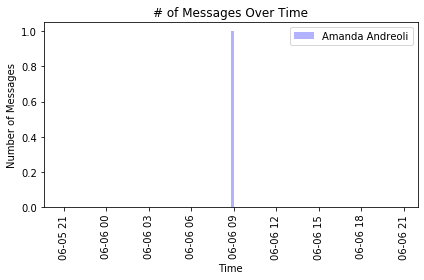

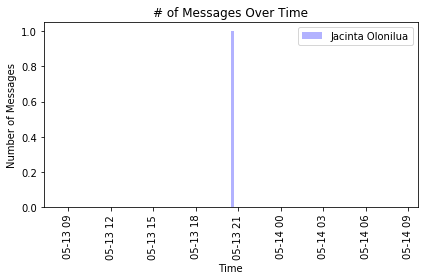

In [66]:
for i in range(0, len(sorted_chats)):
    plot_histogram_time(i)

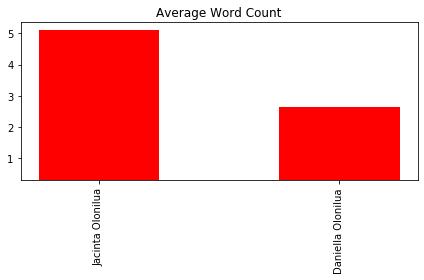

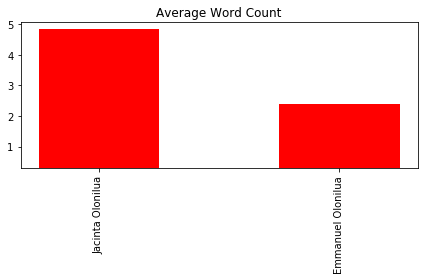

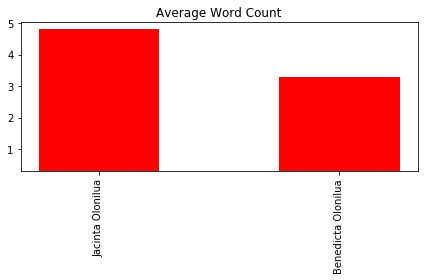

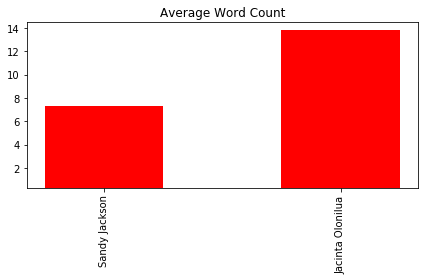

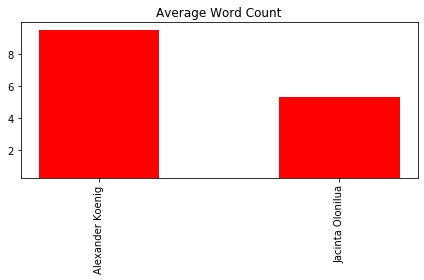

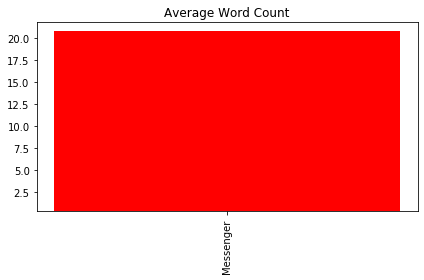

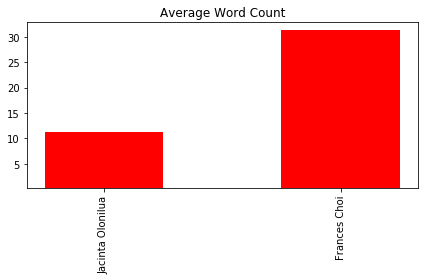

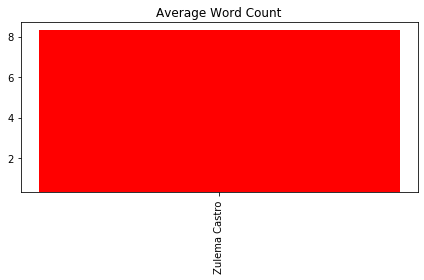

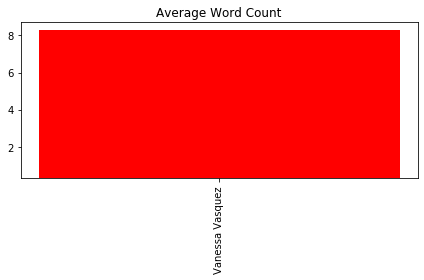

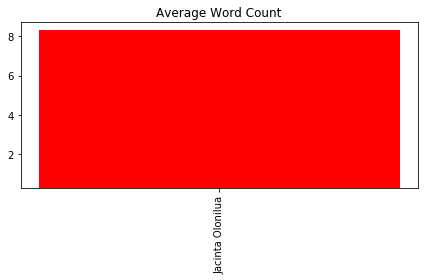

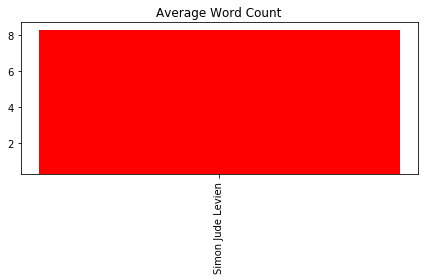

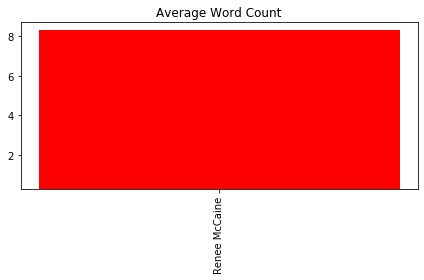

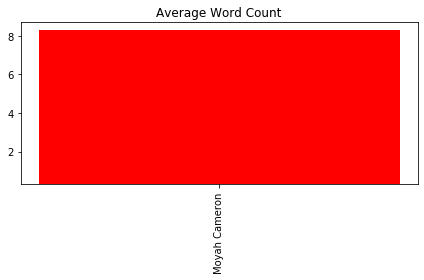

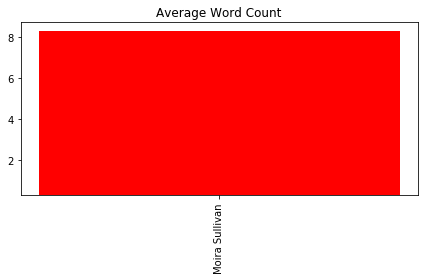

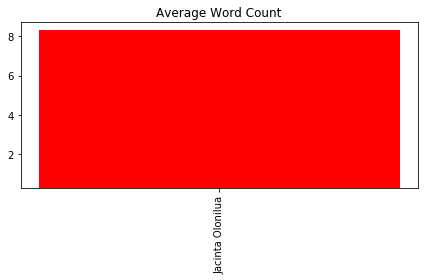

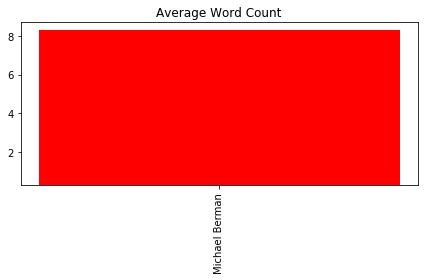

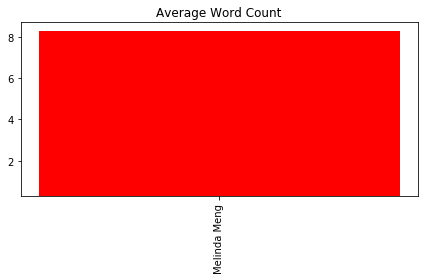

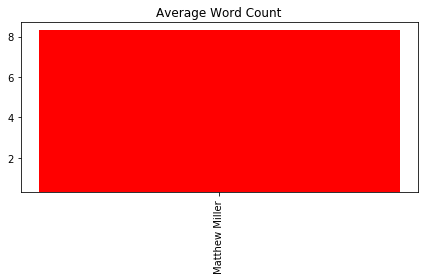

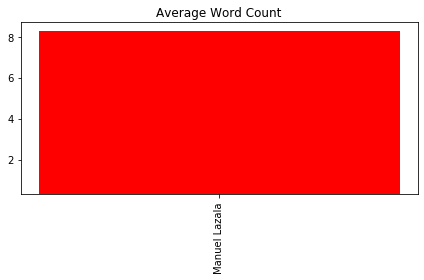

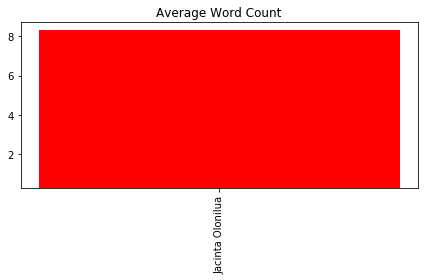

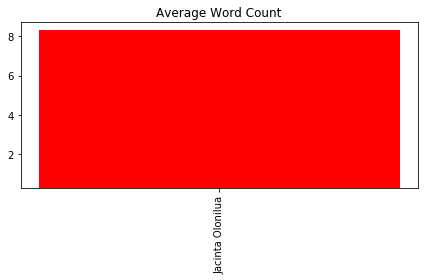

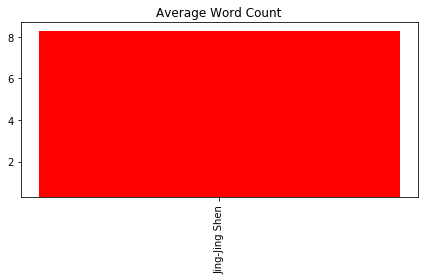

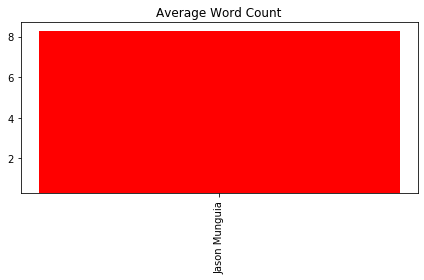

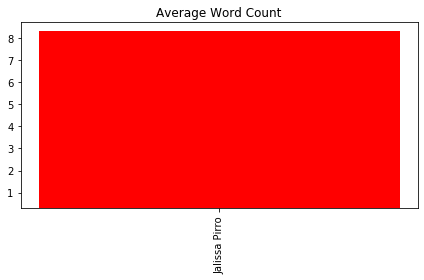

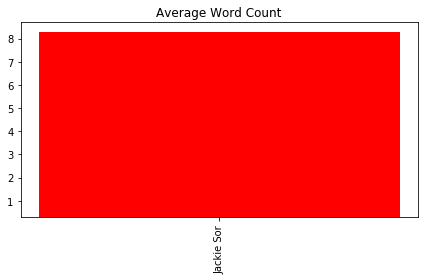

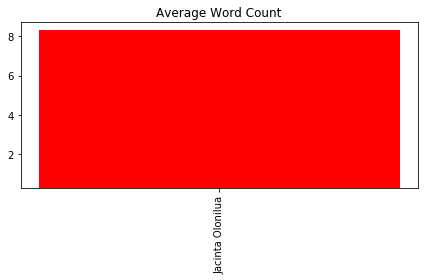

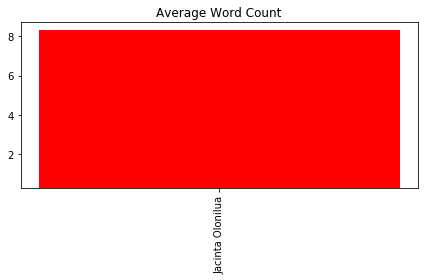

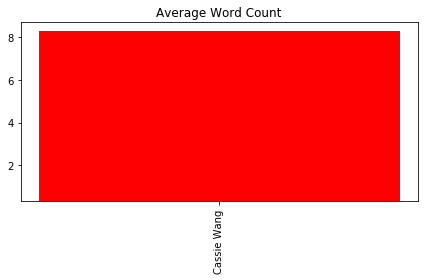

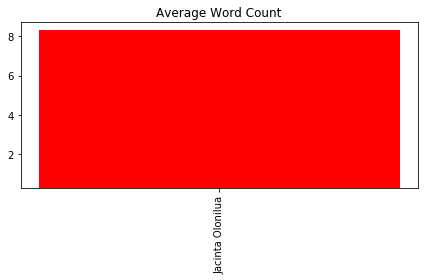

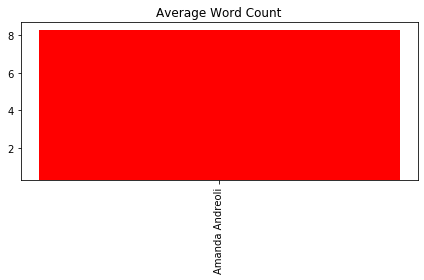

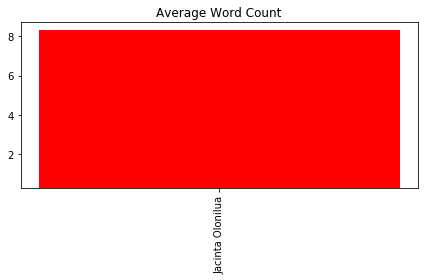

In [67]:
for i in range(0, len(sorted_chats)):
    plot_histogram_words(i)

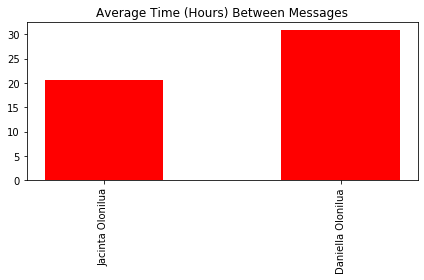

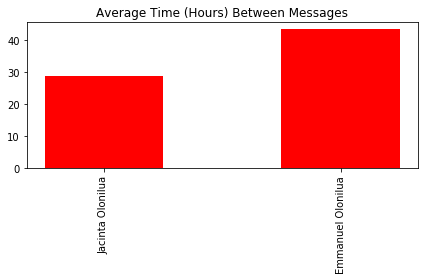

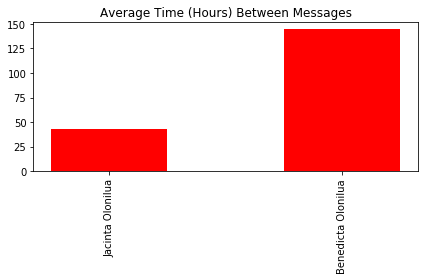

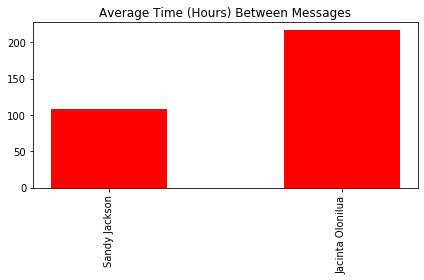

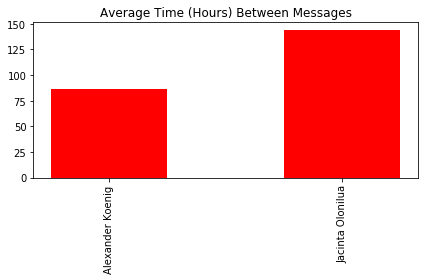

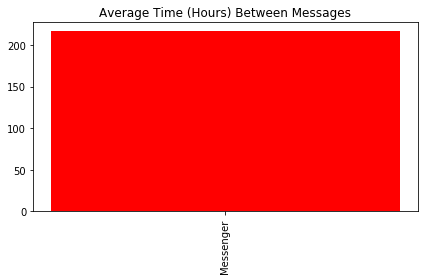

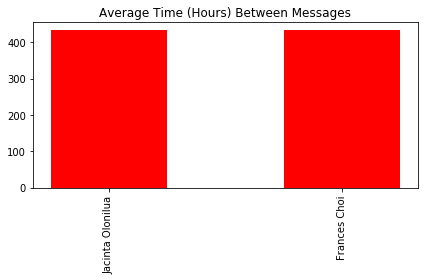

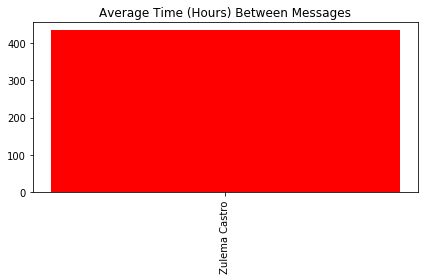

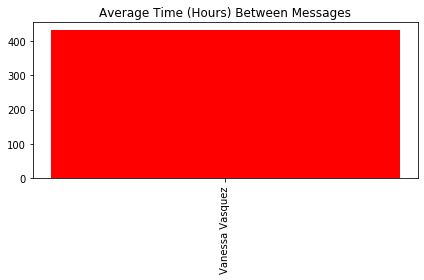

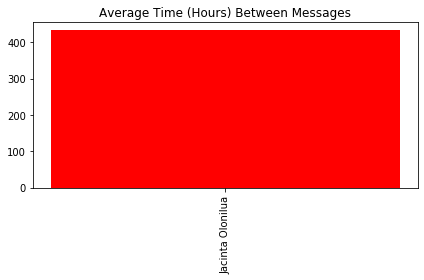

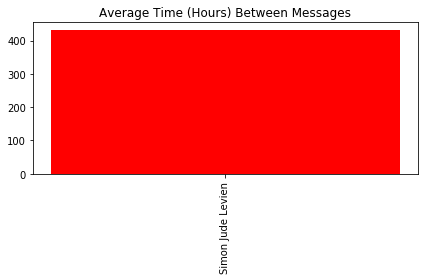

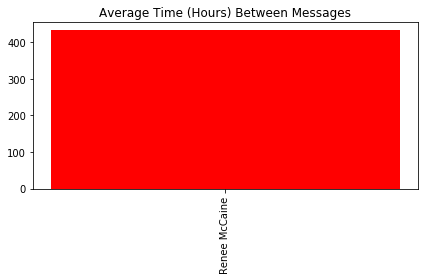

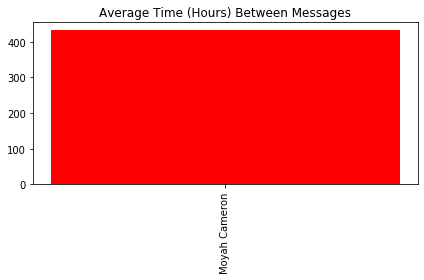

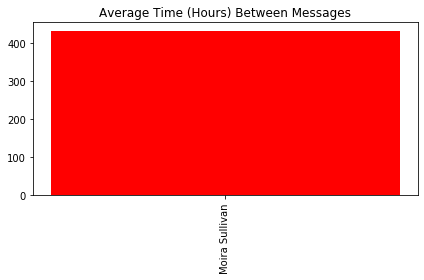

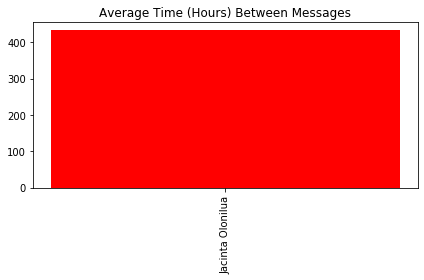

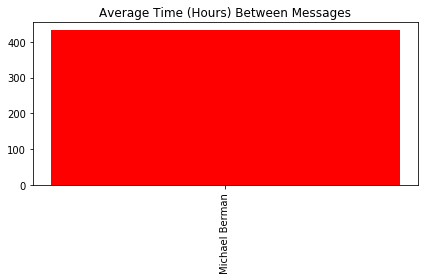

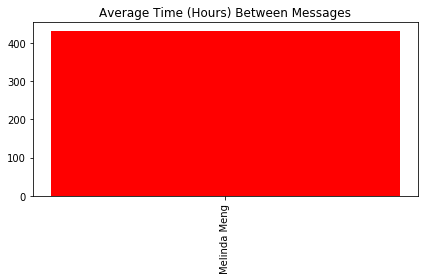

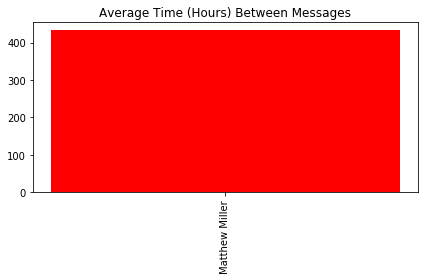

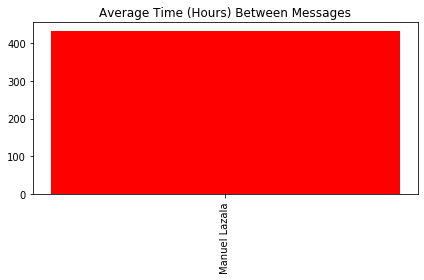

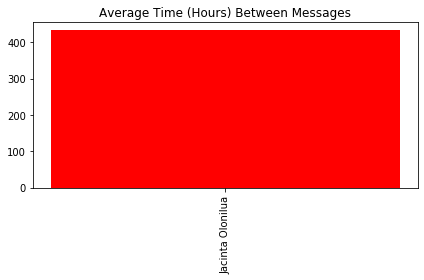

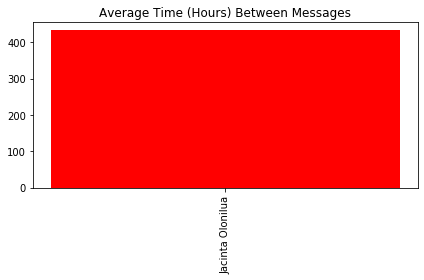

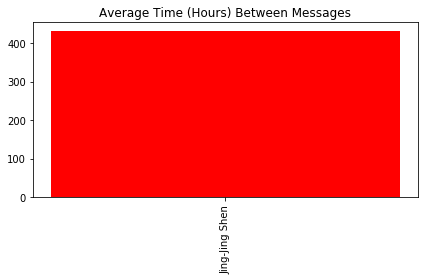

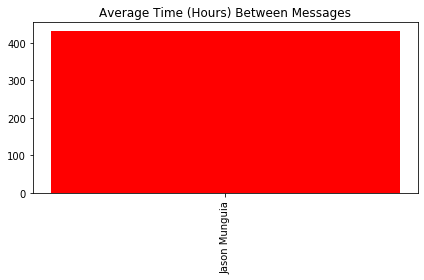

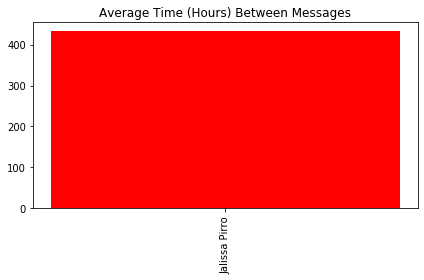

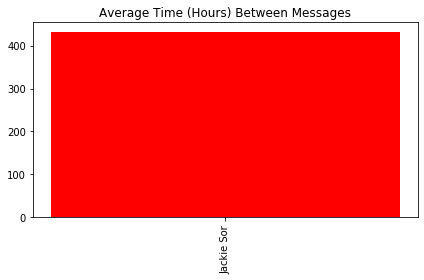

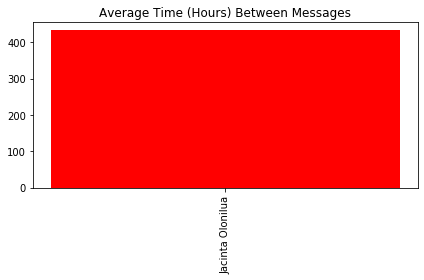

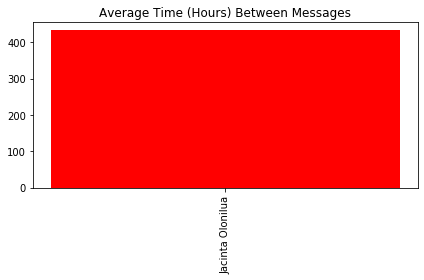

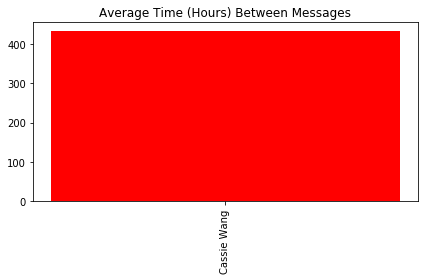

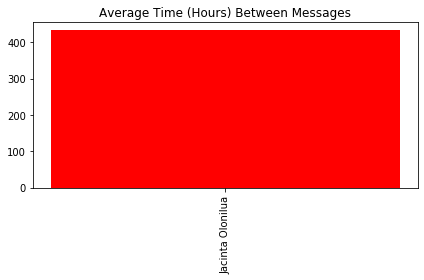

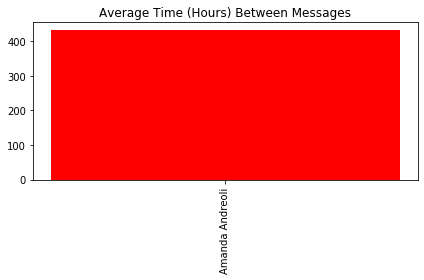

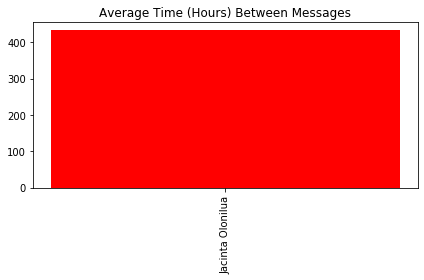

In [68]:
for i in range(0, len(sorted_chats)):
    plot_histogram_average_time_per_message(i)

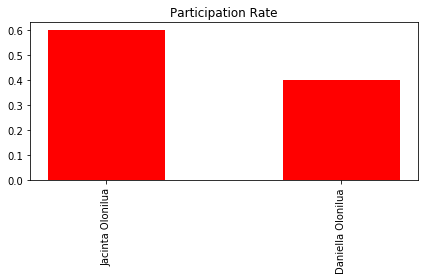

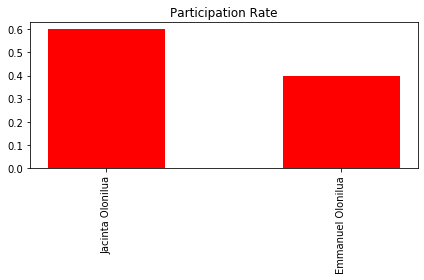

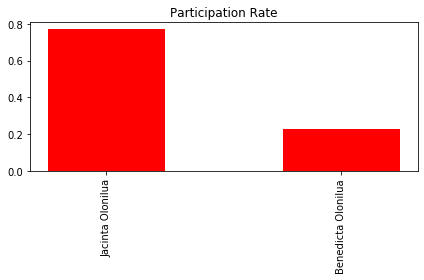

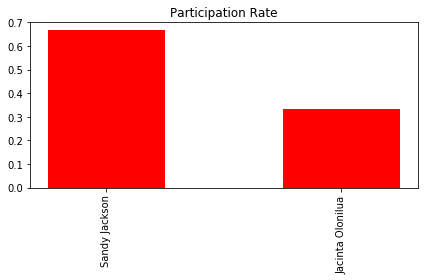

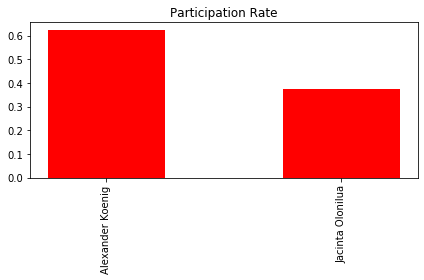

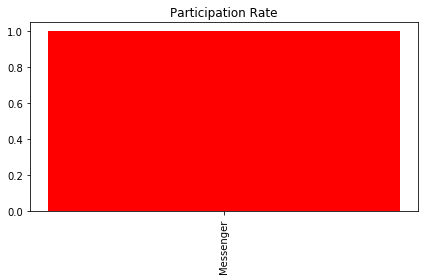

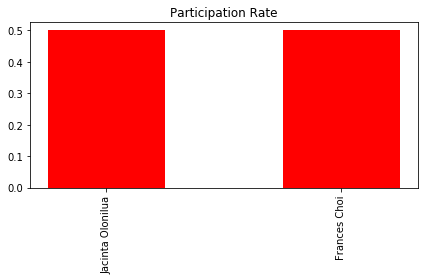

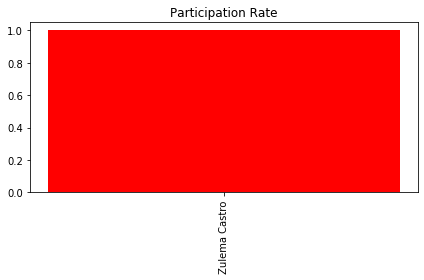

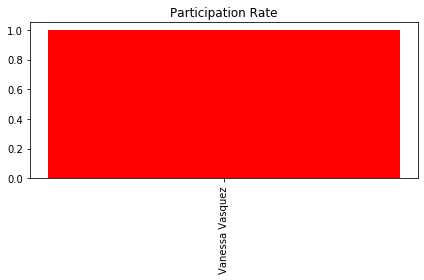

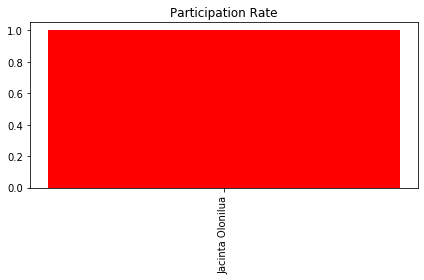

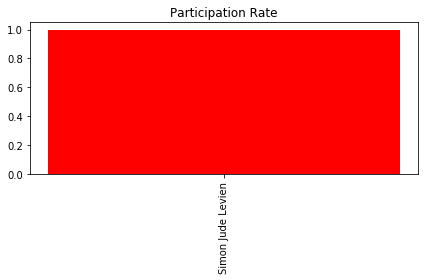

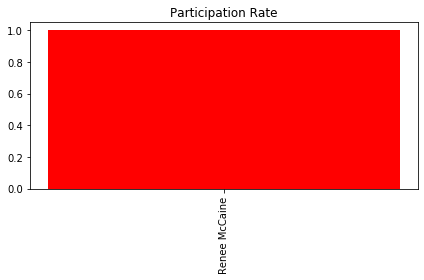

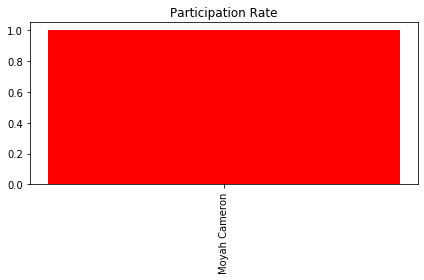

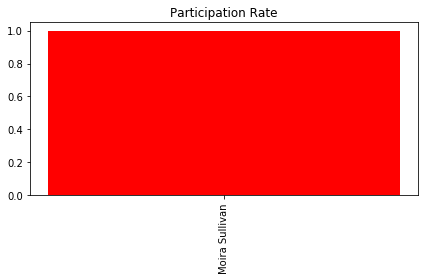

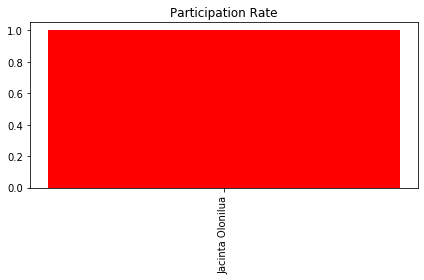

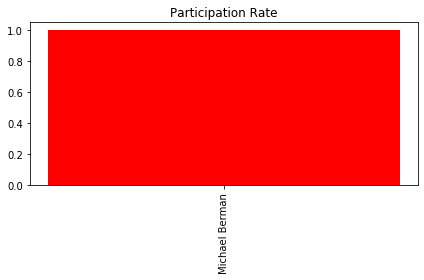

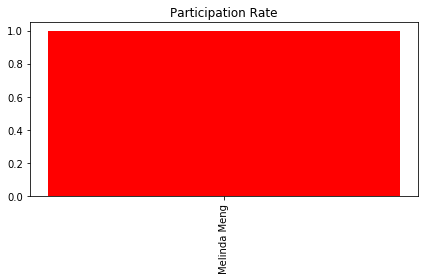

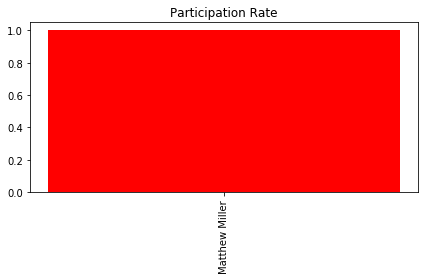

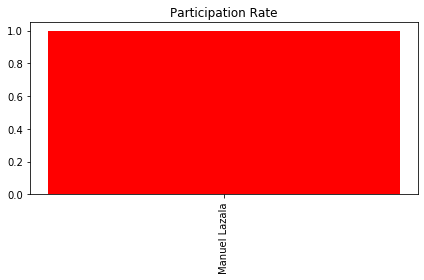

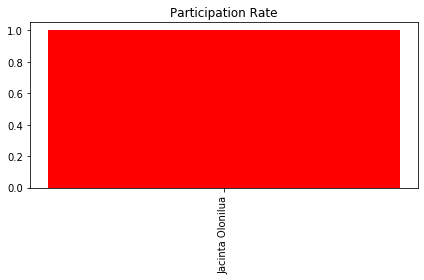

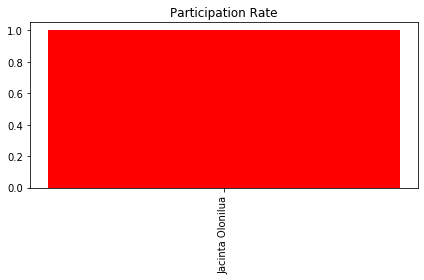

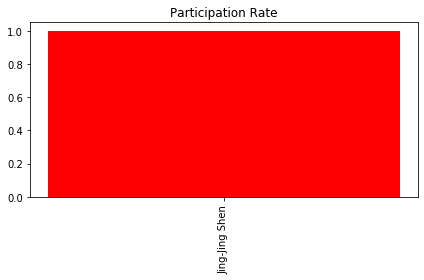

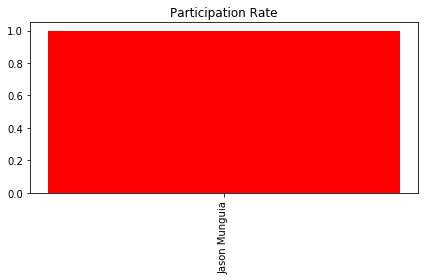

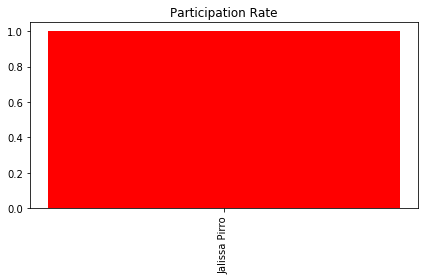

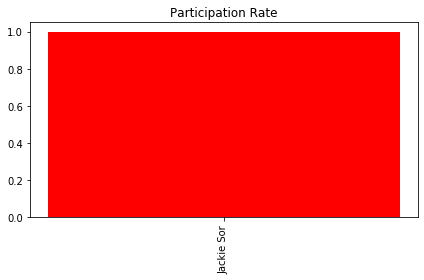

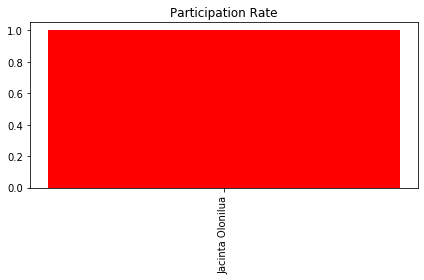

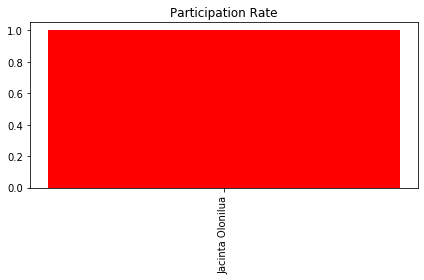

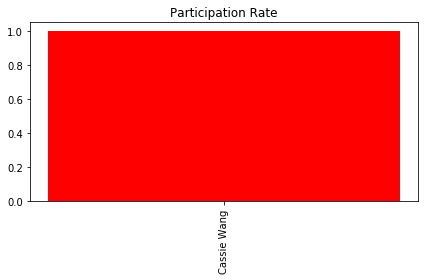

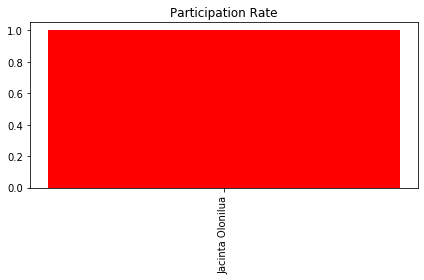

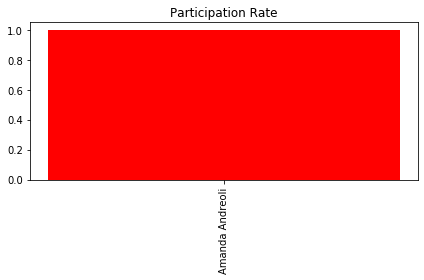

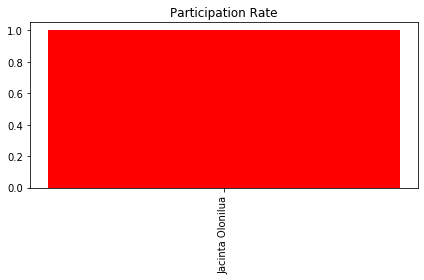

In [69]:
# Plots participation rate (each person's # of messages / total # of messages) for all chats
for i in range(0, len(sorted_chats)):
    plot_histogram_proportion_of_total_messages(i)